# Markov chain implementation

A Markov chain is a mathematical model that represents a sequence of events or "states", where the probability of transitioning from one state to another depends only on the current state and is independent of the past history of states. It is a memoryless stochastic process.

Below is a Markov chain with 3 states, the diagram shows the relationship between those states. This example shows a model of what the weather will be like on each day. Lets say that it rains on a given day, then this model tells us that for the next day there is a 30% chance of it raining again, a 20% chance of it being sunny and a 50% chance of it being cloudy. You can garner information about cloudy and sunny days as well by looking at the diagram.

We call the matrix on the right the transition matrix $P_{ij}$. This matrix holds all the information that the diagram does, but is unfortunately less visually appealing.

For the sake of my programming, we will be labelling the states numerically as: 1 - clouds, 2 - rain, 3 - sun.



In this notebook, I will show some basic features of this Markov chain and in particular, we will exam how the final state depends on the choice of  initial state when we travel long distances along the chain.

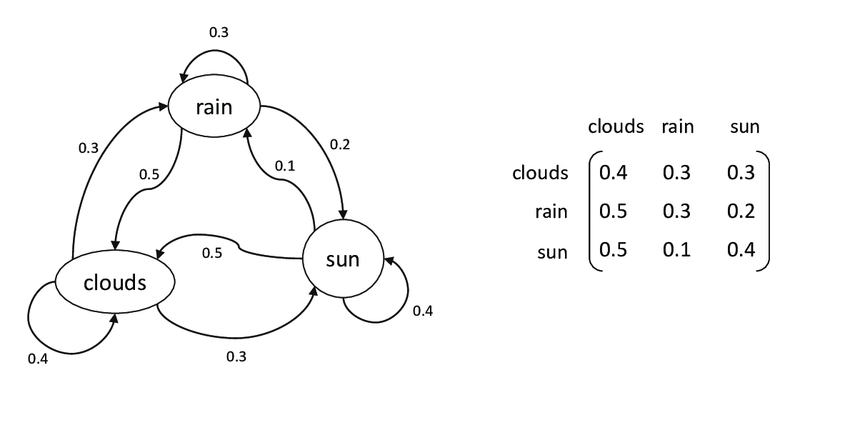

Credit:Tthis image is Figure 2 from the following research paper: Seyr, Helene & Muskulus, Michael. (2019). Decision Support Models for Operations and Maintenance for Offshore Wind Farms: A Review. Applied Sciences. 9. 10.3390/app9020278. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from numpy.linalg import matrix_power
import numpy.linalg
import random

## A random walk

In maths, a random walk consists of taking a number of steps through a random process. If you go long enough, you can sometimes see ordered behaviour emerge from the randomness. Hopefully, we'll be able to find some here. 

To transition between states in a computationally friendly way, we use linear algebra. We can do this because, as mentioned at the start, each state transition depends only on the previous one. Let's represent that in probability language:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}\mathbb{P}(x_{n+1} = j,  x_n = i)
$$

these events are mutually exclusive (only one of them can be happening at any one time) as in each step, the system holds one and only one state with a bit of conditional probability magic, this gives us:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}\mathbb{P}(x_{n+1} = j |  x_n = i)\mathbb{P}(x_n = i)
$$

which is just a linear equation. In addition, we have that the probability of going from i to j on any state is $P_{ij}$ so this gives us that:

$$
\mathbb{P}(x_{n+1} = j) = \sum_{i=0}^{2}P_{ij}\mathbb{P}(x_n = i)
$$

Now if we denote $\mathbb{P}(x_n = i) = \rho_{i}^{(n)}$, then we have the equation:

$$\rho_{j}^{(n+1)} =   \sum_{i=0}^{2}P_{ij}\rho_{i}^{(n)}$$

which translates directly to linear algebra as:

$$(\rho^{(n+1)})^T =   (\rho^{(n)})^TP_{ij}$$

This is quite useful because:

1) We can code this easily

2) We get the following handy recurrence forumla for $(\rho^{(n)})^T$: 

$$(\rho^{(n)})^T =   (\rho^{(0)})^T (P_{ij})^n $$ 

We're gonna use this for our random walk:


In [6]:
def Random_walk(init_state, n):
    '''
    runs a random walk of n steps from
    an initial state in our markov chain
    described above.
    '''
    #set state = init_state
    i = init_state
    #define transition matrix
    Pij = np.array([[0.4,0.3,0.3], [0.5,0.3,0.2], [0.5,0.1,0.4]])
    Pn = np.linalg.matrix_power(Pij, n)
    #create cumsum of Pn for random number selection
    Pi_cum = np.cumsum(Pn[i])
    #select a uniformly random number between 0 and 1
    rand = random.uniform(0,1)
    for j in range(0,len(Pij[0])):
        if rand <= Pi_cum[j]:
            #then state i goes to state j
            return j

In [7]:
#single step random walk from 2
y = np.zeros(500)
for i in range(0,len(y)):
    #closed formula for rho(n)
    y[i] = Random_walk(2,1)
    
#5 step random walk from 2
x = np.zeros(500)
for i in range(0,len(x)):
    x[i] = Random_walk(2,5)
    
#10 step random walk from 2
z = np.zeros(500)
for i in range(0,len(z)):
    z[i] = Random_walk(2,10)

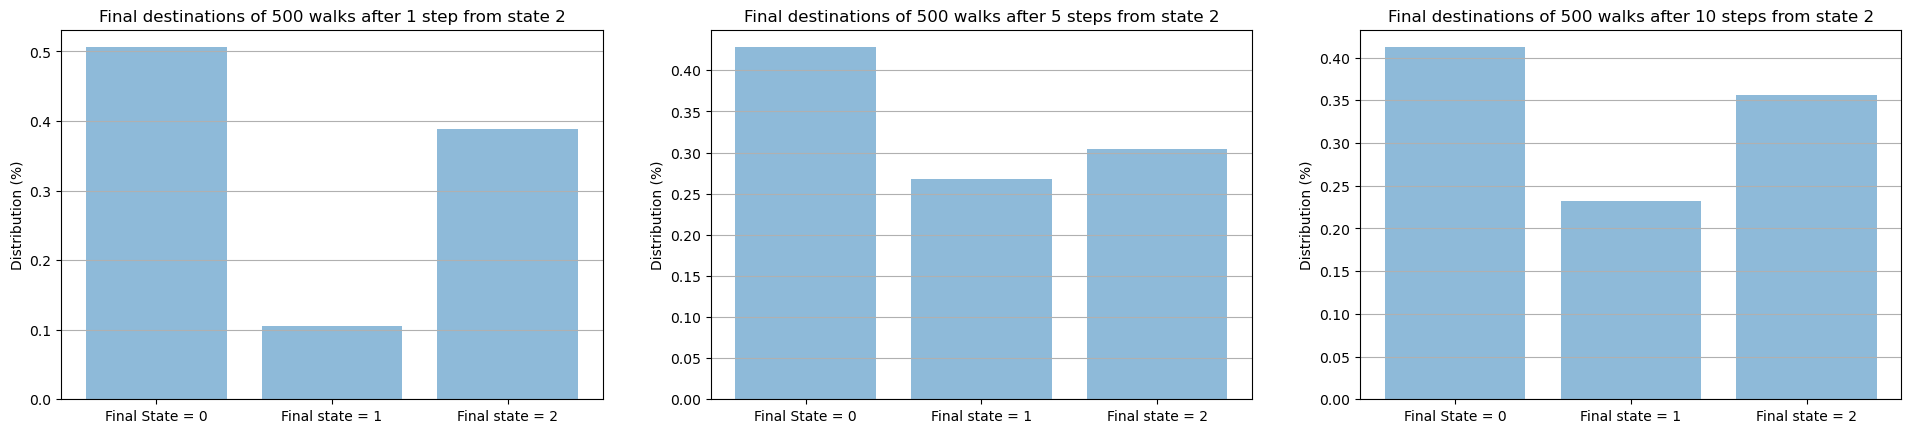

In [8]:
objects = ('Final State = 0', 'Final state = 1', 'Final state = 2')
y_pos = np.arange(len(objects))
performance_y = [len(y[y==0])/500, len(y[y==1])/500, len(y[y==2])/500]

performance_x = [len(x[x==0])/500, len(x[x==1])/500, len(x[x==2])/500]

performance_z = [len(z[z==0])/500, len(z[z==1])/500, len(z[z==2])/500]

fig, ax = plt.subplots(1,3)

plt.subplots_adjust(left=None, bottom=None, right=3, top=None, wspace=None, hspace=None)

ax[0].bar(y_pos, performance_y, align='center', alpha=0.5)
ax[0].set_xticks(y_pos, objects)
ax[0].set_ylabel('Distribution (%)')
ax[0].set_title('Final destinations of 500 walks after 1 step from state 2')


ax[1].bar(y_pos, performance_x, align='center', alpha=0.5)
ax[1].set_xticks(y_pos, objects)
ax[1].set_ylabel('Distribution (%)')
ax[1].set_title('Final destinations of 500 walks after 5 steps from state 2')



ax[2].bar(y_pos, performance_z, align='center', alpha=0.5)
ax[2].set_xticks(y_pos, objects)
ax[2].set_ylabel('Distribution (%)')
ax[2].set_title('Final destinations of 500 walks after 10 steps from state 2')

ax[0].grid(axis = 'y')
ax[1].grid(axis = 'y')
ax[2].grid(axis = 'y')

plt.show()

The above graphs hint at a form of convergence of these probability distributions as n grows large. 

In fact, they exhibit the long term behaviour of markov chains with the mixing property, i.e. the probability distributions contained within $\rho$ of the state change from any state (state two in our case ) tends towards a constant distribution $\pi$. (We also know that our Markov chain is necessarily mixing as it is primitive.)

We can see this further if we examine the long term behaviour in $n$ of our transition matrix $P_{ij}^n$ 

In [12]:
#define transition matrix
Pij = np.array([[0.4,0.3,0.3], [0.5,0.3,0.2], [0.5,0.1,0.4]])


for n in [1,5,10,20,50,100,1000]:
    print('Pij to the power ', n ,' is \n', np.linalg.matrix_power(Pij, n))

Pij to the power  1  is 
 [[0.4 0.3 0.3]
 [0.5 0.3 0.2]
 [0.5 0.1 0.4]]
Pij to the power  5  is 
 [[0.45454 0.23868 0.30678]
 [0.45455 0.23878 0.30667]
 [0.45455 0.23846 0.30699]]
Pij to the power  10  is 
 [[0.45454545 0.23863638 0.30681817]
 [0.45454545 0.23863641 0.30681813]
 [0.45454545 0.23863631 0.30681824]]
Pij to the power  20  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  50  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  100  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]
Pij to the power  1000  is 
 [[0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]
 [0.45454545 0.23863636 0.30681818]]


If we take these numbers to be recurring, we get the following exact form for limit of the transition matrix $P^{\infty}$ :


\begin{pmatrix}
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\frac{45}{99} & \frac{21}{88} &  \frac{1022625}{3333000} \\
\end{pmatrix}



Fortunately, $\frac{45}{99} + \frac{21}{88} + \frac{1022625}{3333000} = 1$ so we have a well defined transition matrix in the sense of probability distributions. 



In [13]:
print('1022625/3333000 + 45/99 + 21/88 =', 1022625/3333000 + 45/99 + 21/88)

1022625/3333000 + 45/99 + 21/88 = 1.0


This behaviour occurs because in an irreducible and aperiodic Markov chain (like we have here), the transition matrix will converge to a unique stationary distribution regardless of the initial state.

The stationary distribution represents an equilibrium point where the Markov chain reaches a balance, and the probabilities of being in each state no longer change. This helps us to understand the long term dynamics of the system. 

## Stationary distribution

Now, what $P^{\infty}$ tells us is that for each initial state $i$, the probability of being ending up in state $j$ after $n$ steps is independent of $i$ when $n$ gets very large. It also tells us the eventual exact probability of being in each state after n steps: 

$$
\mathbb{P}(x_{n} = 0) = 1022625/3333000,  \mathbb{P}(x_{n} = 1) = 45/99 ,  \mathbb{P}(x_{n} = 2) = 21/88
$$

If we choose this as our probability distribution $\pi$ = 
$
\begin{pmatrix}
\frac{45}{99} \\
\frac{21}{88} \\
\frac{1022625}{3333000} \\
\end{pmatrix}
$

then we obtain a probability distribution that is invariant under the transition matrix $\pi P_{ij} = \pi$, we call this a stationary distribution

In [31]:
p100 = np.linalg.matrix_power(Pij, 100) 
pi = p100[0]
print("pi = ", pi)
#show the difference of rhoP and rho
print("|||(pi. P) - pi||| = ",np.linalg.norm( rho @ Pij - rho))

pi =  [0.45454545 0.23863636 0.30681818]
|||(pi. P) - pi||| =  2.7755575615628914e-17


We notice also that this vector can be found a different way. From a linear algebra perspective, this vector would act the same as a left eigenvector of $Pij$ with an eignevalue that is equal to one.

In fact if we transpose our equation for a stationary distribution $\pi P_{ij} = \pi$,  becomes: 

$$P_{ij}^t \pi^t = \pi^t$$

which is similar to the regular (right) eigenvalue equation (when $\lambda$ = 1):

$$Ax = \lambda x$$

from this we can search for $\pi$ as an eigenvalue of the transposed transition matrix $P_{ij}^t$

In [20]:
#print eigenvectors of Pij^t
print("the eigenvalues of are",np.linalg.eig(numpy.matrix.transpose(Pij))[0])
#find evector of eval = 1
vecty = np.linalg.eig(numpy.matrix.transpose(Pij))[1][:,0]
#make the entries sum to 1 (normalise in 1-norm)
vecty = vecty/(vecty[0] + vecty[1] + vecty[2])
print("the eigenvector corresponding to eigenvalue 1 is = ", vecty)


the eigenvalues of are [ 1.  -0.1  0.2]
the eigenvector corresponding to eigenvalue 1 is =  [0.45454545 0.23863636 0.30681818]


Which we can see is the same as $\pi$.

Our Transition matrix has only one eigenvalue of one, however it is possible to have multiple. In this case there would be multiple stationary distributions. 

If we take a step back, this phenomena would correspond to a type of markov chain with a specific property called reducibility.


In simple terms, a reducible Markov chain is one where not all states can be reached from every other state. the system represented by a Markov chain like this would be divided into separate groups of states that couldn't transition between each other. This visual aid should help with the concept.

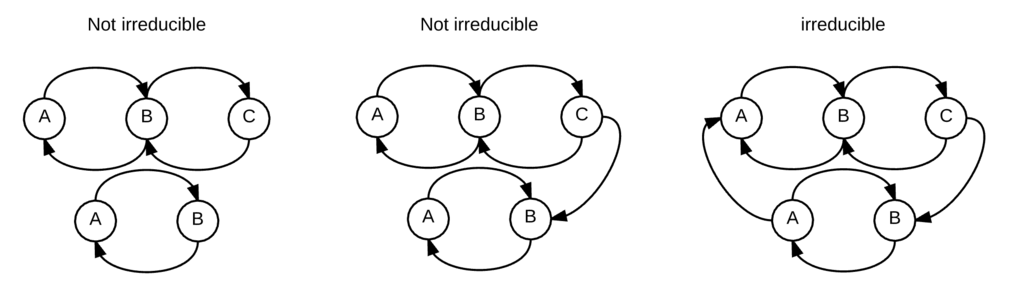
Credit: https://nakaly.hatenablog.com/entry/2017/02/18/061340 retrieved 05/06/2023

In the first image case\, the reducible chain could have two constant distributions, one flowing in the lower quadrant, and one flowing in the upper quadrant. These two would have no effect on each other.